In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
wine_df = pd.read_csv('data/wine.csv', sep=',')
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [67]:
wine_copy = wine_df.copy()

country — страна-производитель вина.

description — подробное описание.

designation — название виноградника, где выращивают виноград для вина.

points — баллы, которыми WineEnthusiast оценил вино по шкале от 1 до 100.

price — стоимость бутылки вина.

province — провинция или штат.

region_1 — винодельческий район в провинции или штате (например Напа).

region_2 — конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например Резерфорд в долине Напа), но это значение может быть пустым.

taster_name — имя сомелье.

taster_twitter_handle — твиттер сомелье.

title — название вина, которое часто содержит год и другую подробную информацию.

variety — сорт винограда, из которого изготовлено вино (например Пино Нуар).

winery — винодельня, которая производила вино.

1. Сколько всего дегустаторов приняло участие в винных обзорах?

In [68]:
wine_copy['taster_name'].nunique()

19

2. Какова максимальная цена за бутылку в этом наборе данных? Введите целое число.

In [69]:
wine_copy['price'].max()

np.float64(3300.0)

3. Проанализируйте представленный датасет и перечислите все числовые признаки через запятую

In [70]:
wine_copy.info()
# имеется ввиду название колонок (points, price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


4. Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их.

In [71]:
wine_copy.duplicated().value_counts()

False    119988
True       9983
Name: count, dtype: int64

In [72]:
wine_copy.drop_duplicates()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


5. Проверьте датасет на наличие пропусков в данных.

In [73]:
wine_copy.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [74]:
wine_copy.isnull().sum() / len(wine_copy) * 100  
# Считаем % пропущенных данных. 
# Метод count() не подходит так как возвращает количество непустых значений в каждом столбце, что может привести к неверному расчету, если в столбце есть пропущенные значения.
# Лучше использовать метод len()

country                   0.048472
description               0.000000
designation              28.825661
points                    0.000000
price                     6.921544
province                  0.048472
region_1                 16.347493
region_2                 61.136715
taster_name              20.192197
taster_twitter_handle    24.015357
title                     0.000000
variety                   0.000769
winery                    0.000000
dtype: float64

<Axes: >

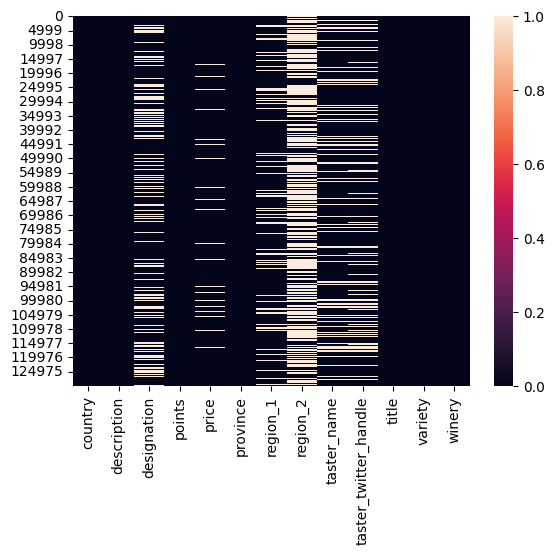

In [75]:
sns.heatmap(wine_copy.isnull())

6. Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в модуле PYTHON-14. Очистка данных.

- Воспользуйтесь правилами:

1. Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.
2. Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
3. Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.

In [76]:
display(wine_copy['province'].mode())
display(wine_copy['variety'].mode())
display(wine_copy['country'].mode())

0    California
Name: province, dtype: object

0    Pinot Noir
Name: variety, dtype: object

0    US
Name: country, dtype: object

In [77]:
# задаем минимальный порог: вычисляем 70% от числа строк
thresh = wine_copy.shape[0]*0.7
# удаляем столбцы, в которых более 30% (100-70) пропусков
wine_copy = wine_copy.dropna(thresh=thresh, axis=1)  # удаляем записи, в которых есть хотя бы 1 пропуск

# признаки с пропусками заменим на unknown
wine_copy['designation'] = wine_copy['designation'].fillna('unknown')
wine_copy['region_1'] = wine_copy['region_1'].fillna('unknown')
wine_copy['taster_name'] = wine_copy['taster_name'].fillna('unknown')
wine_copy['taster_twitter_handle'] = wine_copy['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
wine_copy['country'] = wine_copy['country'].fillna('US')
wine_copy['price'] = wine_copy['price'].fillna(wine_copy['price'].mean())
wine_copy['province'] = wine_copy['province'].fillna('California')
wine_copy['variety'] = wine_copy['variety'].fillna('Pinot Noir')

# отображаем результирующую долю пропусков
wine_copy.isnull().sum() / len(wine_copy) * 100


country                  0.0
description              0.0
designation              0.0
points                   0.0
price                    0.0
province                 0.0
region_1                 0.0
taster_name              0.0
taster_twitter_handle    0.0
title                    0.0
variety                  0.0
winery                   0.0
dtype: float64

<Axes: >

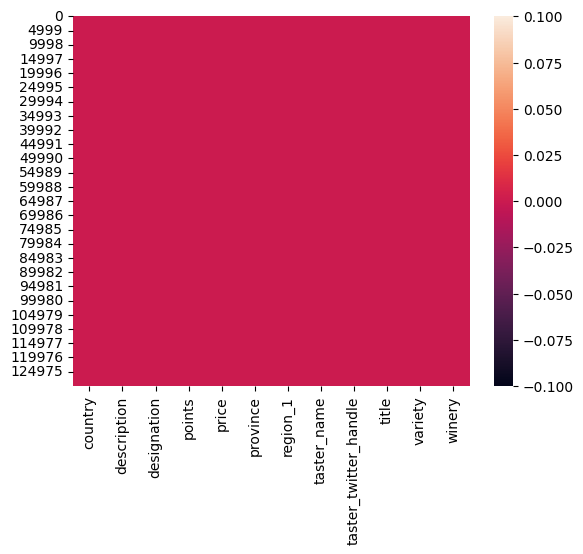

In [78]:
sns.heatmap(wine_copy.isnull())

In [79]:
# df = df.to_csv('wine_cleared.csv', index=False) # сохраняем очищенный датасет для дальнейшей работы